In [12]:
#---------------------------Statistics Training Day 2-----------------------------------------
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

In [13]:
data = np.loadtxt('hipparchos_subsample.dat')
data_range = np.arange(0,9998)

In [14]:
#From Day 1
bins0 = np.linspace(0,1000,101)
bins1 = bins0[0:-1]
y = np.sqrt(bins1)*np.exp((-1.0*bins1/150))
dmax = np.max(bins1); dmin =np.min(bins1); binwidth = np.float(dmax-dmin)/100
normalized_y = y/(np.sum(y)*binwidth)
BinCumulSum = np.cumsum(normalized_y*binwidth)


counts0 = np.histogram(data, bins0)
datalength = len(data)*1.0
counts = counts0[0]/datalength
CumulSum = np.cumsum(counts)


In [15]:
#---------------------------------------Day 2-----------------------------------------------
# Attempting a K-S Test. Finding the maximum difference in probability (y-axis) in every bin.
ProbDiff = BinCumulSum - CumulSum
print ProbDiff.max()
print np.argmax(np.abs(ProbDiff)) # returns the index number of the maximum element of this ProbDiff array
print bins1[np.argmax(np.abs(ProbDiff))]

0.0461681901595
12
120.0


For one trial:
[  0.00000000e+00   1.00000000e-02   2.00000000e-02 ...,   9.99700000e+01
   9.99800000e+01   9.99900000e+01]


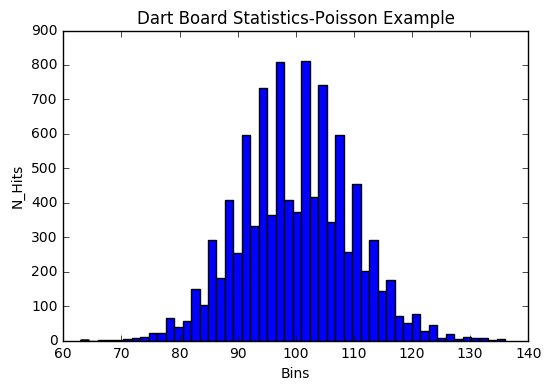

In [16]:
#Example, random counting in one experiment
Random = np.array(np.random.uniform(0,1,1000))
#print N[np.where(N < 0.1)]
print "For one trial:"
#print len(N[np.where(N < 0.1)])

#Let's repeat this experiment 10,000 times and plot the results
N_hits = []
for ii in range(0,10000):
    N = np.array(np.random.uniform(0,1,1000))
    N_hits.append(len(N[np.where(N < 0.1)]))


#Creating Bins
Bins = np.linspace(0,100,10001)
bins = Bins[0:-1]

len(bins)
print bins

#counts = np.histogram(N_hits, bins)
plt.hist(N_hits, bins=50)
plt.xlabel('Bins')
plt.ylabel('N_Hits')
plt.title('Dart Board Statistics-Poisson Example')
plt.show()

In [17]:
#Let's see how much of this distribution is between 90 and 110:
N_hits = np.array(N_hits)
tmp = N_hits[[N_hits>90]] # Both require 
N_hits2 = tmp[[tmp<110]]  # two brackets [[]]

print len(N_hits2)/100,'%' # Number of hits between 90 and 110/

print np.mean(N_hits) ; print np.std(N_hits)

67 %
99.9485
9.51404476288


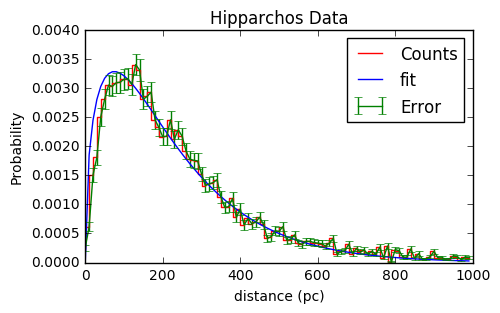

In [18]:
#Let's look back at the orignal histogram for Hipparcos Data

N_tot = np.float(len(counts))
sigma = np.sqrt(counts)/N_tot/binwidth ; #print sigma 
dPddist = counts/N_tot/binwidth

counts_one_hundred = counts/binwidth

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'blue', label = 'fit')
ax.errorbar(bins1, counts_one_hundred, yerr=sigma, color = 'green', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
plt.show()

In [19]:
#Chi Squared

chisq = np.sum(((counts_one_hundred - normalized_y)/sigma)**2) ; print chisq

#convert to Probabaility (P-value)
#degrees of freedom: number of data points-free parameters ~ # of bins = 100
P_Value = 1 - stats.chi2.cdf(chisq,100); print P_Value 
#stats.chi2.cdf() gives probability that model is ruled out.
#one minus stats.chi2.cdf() gives probability that model agrees with data
P_Value2 = 1 - stats.chi2.cdf(30,100); print P_Value2 #where chisq = 50, very good fit!

664.270156629
0.0
0.999999999999
